## Task #1: Simple linear Regression with Sickit-learn - TSF GRIP
### Author: J.Zakaria
In this Task we'll perform a Supervised Machine Learning model to predict the Students Grades based on their Hours of Study per Day.

### Assessing the data:
In this project we'll see how the hours of study impact the scores of the students, first let's import the data [with](https://www.delftstack.com/howto/python/python-download-csv-from-url/).

In [1]:
import pandas as pd

# Importing the data
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
print(df.shape) ; df.head(8)

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60


Let's visualize our dataset on a scatter plot using seaborn.

/home/user/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Text(0.5, 1.0, 'Hours vs Percentage')

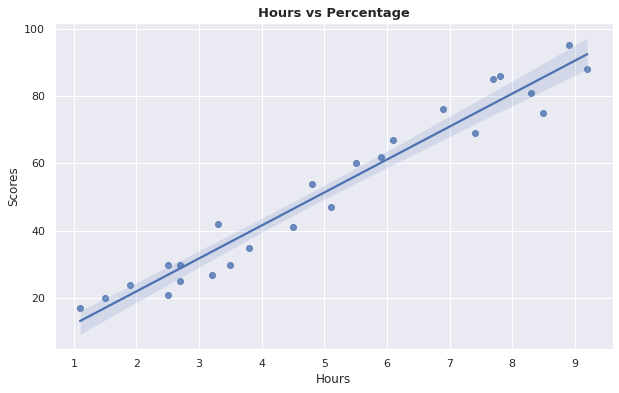

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

plt.figure(figsize=(10, 6)) #dpi=80

sns.set_theme(color_codes=True)
ax = sns.regplot(x="Hours", y="Scores", data=df)
plt.title('Hours vs Percentage', fontsize=13, fontweight="bold")  

##### As we see we have a positive linear correlation between Hours and Scores. Let's run a linear [regression](https://www.geeksforgeeks.org/python-linear-regression-using-sklearn/).

### Preparing the model:
In this part we'll split the data into two parts train and test, then we'll train the model.

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
# choosing the X and y values
X = np.array(df['Hours']).reshape(-1, 1)
y = np.array(df['Scores']).reshape(-1, 1)

# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Training the model
reg = LinearRegression()
reg.fit(X_train, y_train)

print("Regession Score is: " + str(reg.score(X_test, y_test)))

Regession Score is: 0.9127268929163728


It looks pretty high, let's check the other coefficients

In [5]:
print(f"intercept: {reg.intercept_}")
print(f"slope: {reg.coef_}")

intercept: [1.85391914]
slope: [[9.89163485]]


### predict and validate the model:
In this part we'll use the testing data and we'll evaluate the model.

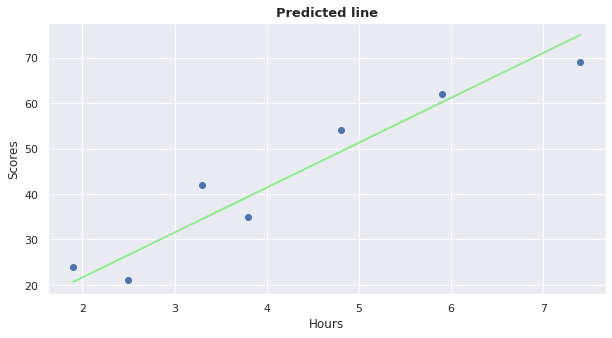

In [12]:
plt.figure(figsize = [10, 5])

# predicting the unseen data
y_pred = reg.predict(X_test)

# plotting the predictions 
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='lightgreen')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Predicted line", fontsize=13, fontweight="bold")

plt.show()

Since we plotted our predictions they looks good enough, but let's evaluate the errors.

In [7]:
com = pd.DataFrame({'Actual': list(y_test), 'Predicted': list(y_pred)})
com

,Actual,Predicted
0,[62],[60.214564775746204]
1,[24],[20.648025361105514]
2,[21],[26.583006273301617]
3,[35],[39.44213158305984]
4,[42],[34.49631415622975]
5,[69],[75.05201705623647]
6,[54],[49.33376643672001]


In [8]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)

#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 4.769212026113777
MSE: 25.718850332399533
RMSE: 5.071375585814911


In [9]:
# Or:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.769212026113777


### What will be the score of the students if they study 9.25 h/d?
Since we evaluated the model and we got a good score, it's time to apply our model to the purpose of this study.

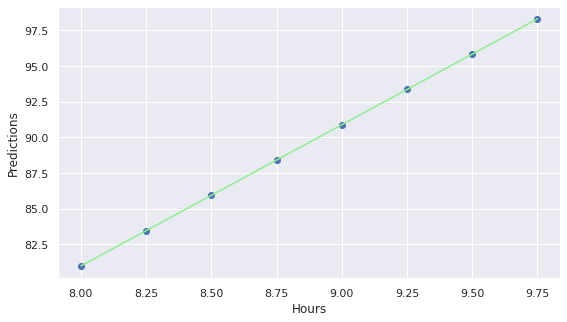

In [10]:
plt.figure(figsize = [9, 5])

p = np.arange(8, 10, 0.25).reshape(-1, 1)

y_p =  reg.predict(p)

plt.scatter(p, y_p, color ='b')
plt.plot(p, y_p, color ='lightgreen')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.ylabel("Predictions")


plt.show()

In [11]:
l = np.array(9.25).reshape(-1, 1)
print(f"If the students study 9.25 h/d they'll score: {reg.predict(l)}")

If the students study 9.25 h/d they'll score: [[93.35154154]]
